#**NFL Statistics Analysis**#

#Overview and df Versions#
*   This data captures NFL statistics and spans 1920-2017
*   **df** is the basic_stats.csv data frame; (Rows, Columns) = (17026, 17). This includes player demographics such as birth place, name, birth date, seasons played, etc. There are a total of 82690 missing values.
*   **df2** (appears later is the cleaned df basic_stats.csv dataframe) (Rows, Columns) = (13498, 19)
*   **df_birth_state** new dataframe that captures the number of players born in each state and was created from Basic_Stats.csv (Rows, Columns) = (55, 1).
*   **df_pass** is the dataframe containing passer ratings by year for each player and was created from Career_Stats_Passing.csv (Rows, Columns) = (8525, 21). This includes player statistics for passing by year; columns include player name, passes attempted, passes completed, year played, etc. There are 7414 missing values.
*   **df_pass2** is the merged dataframe of df2 and df_pass
*   **df_pass3** is the cleaned merged dataframe used for machine learning
*   **df_birth_state** is a dataframe that has the number of players from each state

#Notebook Set Up#

In [ ]:
autosave 60

Autosaving every 60 seconds


In [ ]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#importing packages for data analysis
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
import plotly.graph_objects as go

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')

In [ ]:
#set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
#Diego delete this for submission
#run this cell to mount your Google drive to the notebook; you need to give it access to your SCU Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DIEGO change the pathway
df  = pd.read_csv('/content/drive/Shareddrives/Python_NFL_Project/Basic_Stats.csv', index_col=10)
df_pass = pd.read_csv('/content/drive/Shareddrives/Python_NFL_Project/Career_Stats_Passing.csv', index_col =1)

#Data Exploration#

In [ ]:
df.head(5)

NameError: ignored

In [ ]:
print('Number of Rows in Basic_Stats.csv: ' + str(len(df)))

In [ ]:
#checking for missing values in df
df.isna().any()

In [ ]:
#checking the number of the missing values
df.isna().sum()

In [ ]:
#further description of missing values
df.isna().sum().sum()

In [ ]:
#of missing values
print('Number of missing values in df: ' + str(df.isna().sum().sum()))

In [ ]:
#getting a description of the df
df.describe()

Passing Statistic Variables

In [ ]:
df.head(5)

In [ ]:
#taking a look at the missing values
df[df.Experience.isnull()]

# Data Cleaning of df

In [ ]:
#dropping missing values from the'Height' column as there are only 146 of 82690 values missing
traiing


NameError: ignored

In [ ]:
df.isna().any()

In [ ]:
#exploring the Passer Rating Column in df_pass
df_pass['Passer Rating'].describe()

In [ ]:
#checking for missing values in the Passer Rating column in df_pass
df_pass['Passer Rating'].isna().sum()

Data Cleaning of 'Years Played', 'Experience', and 'Seasons' Columns#

In [ ]:
#checking the ['Years Played'] column; note the mix of numbers and strings; will need to convert this for easier data analysis
df['Years Played']

In [ ]:
#Make a column for the start year
#df['Start_Year']=df['Years Played'] then some code to indicate the first 4 characters
df[['Year Start','Year End']]  = df['Years Played'].str.replace(')','',regex=True)\
            .replace(' ','')\
            .str.split('-',expand=True)

In [ ]:
#determining how many null values are in the 'Year End' column
df['Year End'].isnull().sum()

In [ ]:
  #checking the isnull values for year start and year end
  #maybe find the database year and subtract the seasons from that value to = year start?
  df[df['Year End'].isnull()].head(5)

In [ ]:
#made a copy of df under df2
df2 = df.copy()

NameError: ignored

In [ ]:
#verifying that df and df2 are identical
df.shape

In [ ]:
#verifying that df and df2 are identical
df2.shape

In [ ]:
#filled 'Year End' nan values with 2017, the year the database ends
df2['Year End'].fillna(value=2017, inplace= True)

In [ ]:
#converted all string values to integer values in the 'Year End' column
df2['Year End'].apply(lambda x: int(x))

In [ ]:
#checking df2
df2.head(5)

In [ ]:
#dropped all missing values from the experience column
df2.dropna(how='any',subset=['Experience'],inplace=True)

In [ ]:
#verified that all missing values from the experience column were dropped
df2.isnull().any()

In [ ]:
#understanding the Year start data
df2['Year Start'].describe()

In [ ]:
#Checking'Experience' column unique values
df.Experience.unique()

In [ ]:
#made a function to make the clean the 'Experience' column
def experience_preprocess (seasons):
  seasons_str_list = []
  for n in seasons:
    formatted_string = n.replace(' ',''
        ).replace('Seasons',''
        ).replace('seasons',''
        ).replace('Season',''
        ).replace('season',''
        ).replace('st',''
        ).replace('nd',''
        ).replace('rd',''
        ).replace('th',''
        ).replace('Rookie','1'
        ).split(
        )
    seasons_str_list.extend(formatted_string)
  return seasons_str_list

In [ ]:
#created a new column 'Seasons' from the cleaned 'Experience' column
df2['Seasons'] = experience_preprocess (df2['Experience'])
df2[df2['Year Start'].isnull() & (df2['Current Status' ]!= 'Active')]

In [ ]:
#subtract the end year from the start year to get the seasons for the missing values
df2['Year End'].fillna(value = 2017)

In [ ]:
#checking to see if there are any missing values after doing the above steps
df2['Year End'].isna().any()

NameError: ignored

In [ ]:
#lambda function to convert strings to integers in Seasons
df2.Seasons = df2.Seasons.apply(lambda x: int(x))

In [ ]:
#lambda function to convert strings to integers in Seasons
df2['Year End'] = df2['Year End'].apply(lambda x: int(x))

In [ ]:
#filling missing values for year start to 2017 - the # of seasons they've played as missing values are for the active players
df2['Year Start'].fillna(value = 2017 - df2['Seasons'], inplace= True)

In [ ]:
#checking for missing values
df2['Year Start'].isna().any()

In [ ]:
#make all values integers in Year Start
df2['Year Start'] = df2['Year Start'].apply(lambda x: int(x))

In [ ]:
#checking the data type in ['Year Start']
type(df2['Year Start'].iloc[1])

In [ ]:
#checking data range
print('First Year Start: ' + str(df2['Year Start'].min()) + '\n' +
'Last Year Start: ' + str(df2['Year Start'].max()))

In [ ]:
#checking to see if there are any strings in Year Start
np.any([isinstance(val, str) for val in df2['Year Start']])

In [ ]:
#checking to see if there are any strings in Year End
np.any([isinstance(val, str) for val in df2['Year End']])

In [ ]:
#checking to see if the above steps worked to resolve the missing data
df2.head(10).sort_values(by = 'Year End', ascending = False)

In [ ]:
#this describes the characteristics of the seasons column
df2.Seasons.describe()

In [ ]:
#dropped the 'Experience' column with the uncleaned data
df2.drop(columns='Experience', inplace = True)

In [ ]:
#database was uploaded: 2017; will subtract the # of seasons from 2017 to get the start date
#verifying that this works before making permanent
df2['Year Start'].fillna(value=2017-df2['Seasons']).isna().any()

In [ ]:
df2['Year Start'].fillna(value=2017-df2['Seasons'], inplace = True)
#checking by displaying the list of active players
df2[df2['Current Status'] == 'Active'].head(5)

#Data Cleaning to make a Heatmap for where players come from using plotly express

In [ ]:
df2['Birth Place']

Name
Evans, Fred       Grand Rapids , MI
Raiff, Jim              Dayton , OH
Fowler, Bobby           Temple , TX
Johnson, Quinn     New Orleans , LA
Walton, L.T.           Detroit , MI
                        ...        
Goovert, Ron           Detroit , MI
Folsom, J.D.           Worland , WY
Reader, Jamie       Washington , DC
Barnett, Solon     New Willard , TX
Johnson, Byron           Bryan , TX
Name: Birth Place, Length: 17026, dtype: object

In [ ]:
#this is a cleaned dataframe; we are trying to take the Birth Place column and convert it into a heatmap with either seaborn or plotly express
#since it does not provide lattitude/longitude, there is no input in plotly express
df2.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons
Name,,,,,,,,,,,,,,,,,
"Evans, Fred",NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,71.00,NaN,NaN,NaN,fredevans/2513736,NaN,185.00,1946 - 1948,1946,1948,3
"Raiff, Jim",NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,70.00,NaN,NaN,NaN,jimraiff/2523700,NaN,235.00,1954 - 1954,1954,1954,1
"Fowler, Bobby",56.00,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1
"Johnson, Quinn",30.00,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5
"Walton, L.T.",25.00,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3


In [ ]:
birth_place = df2['Birth Place'].str.split(' , ')

In [ ]:
birth_place

Name
Evans, Fred       [Grand Rapids, MI]
Raiff, Jim              [Dayton, OH]
Fowler, Bobby           [Temple, TX]
Johnson, Quinn     [New Orleans, LA]
Walton, L.T.           [Detroit, MI]
                         ...        
Goovert, Ron           [Detroit, MI]
Folsom, J.D.           [Worland, WY]
Reader, Jamie       [Washington, DC]
Barnett, Solon     [New Willard, TX]
Johnson, Byron           [Bryan, TX]
Name: Birth Place, Length: 17026, dtype: object

In [ ]:
df2.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons
Name,,,,,,,,,,,,,,,,,
"Evans, Fred",NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,71.00,NaN,NaN,NaN,fredevans/2513736,NaN,185.00,1946 - 1948,1946,1948,3
"Raiff, Jim",NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,70.00,NaN,NaN,NaN,jimraiff/2523700,NaN,235.00,1954 - 1954,1954,1954,1
"Fowler, Bobby",56.00,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1
"Johnson, Quinn",30.00,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5
"Walton, L.T.",25.00,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3


In [ ]:
#make the 'Birth City' and 'Birth State' into separate columns
df2['Birth City'] = df2['Birth Place'].str.split(' , ', expand = True)[0]
df2['Birth State'] = df2['Birth Place'].str.split(' , ', expand = True)[1]

In [ ]:
df2.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State
Name,,,,,,,,,,,,,,,,,,,
"Evans, Fred",NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,71.00,NaN,NaN,NaN,fredevans/2513736,NaN,185.00,1946 - 1948,1946,1948,3,Grand Rapids,MI
"Raiff, Jim",NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,70.00,NaN,NaN,NaN,jimraiff/2523700,NaN,235.00,1954 - 1954,1954,1954,1,Dayton,OH
"Fowler, Bobby",56.00,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1,Temple,TX
"Johnson, Quinn",30.00,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5,New Orleans,LA
"Walton, L.T.",25.00,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3,Detroit,MI


In [ ]:
#dropping the ['Birth Place'] column
df2.drop(columns='Birth Place', inplace = True)

In [ ]:
#Number of unique states
df2['Birth State'].nunique()

64

In [ ]:
#Unique states list
df2['Birth State'].unique()

array(['MI', 'OH', 'TX', 'LA', 'IL', 'WY', 'FL', 'PA', nan, 'AR', 'MO',
       'IA', 'AL', 'NV', 'CA', 'MA', 'NY', 'MS', 'NJ', 'KS', 'CT', 'IN',
       'GA', 'NC', None, 'TN', 'MD', 'VA', 'NE', 'RI', 'KY', 'WI', 'MT',
       'MN', 'SC', 'CO', 'OR', 'AZ', 'OK', 'WA', 'Manitoba', 'B.C.', 'HI',
       'DC', 'SD', 'Sicily', 'UT', 'ND', 'WV', 'NH', 'ID', 'ME', 'DE',
       'Nova Scotia', 'NM', 'Ontario', 'Alberta', 'Quebec',
       'Saskatchewan', 'AK', 'New York', 'VT', 'Ukraine', 'Croatia',
       'Victoria', 'Estonia'], dtype=object)

In [ ]:
df2['Birth State'].replace()

Name
Evans, Fred       MI
Raiff, Jim        OH
Fowler, Bobby     TX
Johnson, Quinn    LA
Walton, L.T.      MI
                  ..
Goovert, Ron      MI
Folsom, J.D.      WY
Reader, Jamie     DC
Barnett, Solon    TX
Johnson, Byron    TX
Name: Birth State, Length: 17026, dtype: object

In [ ]:
#Total players missing birth state
df2['Birth State'].isna().sum()

2747

In [ ]:
df2['Birth State'].fillna(value='Unknown', inplace=True)

In [ ]:
#made a function to make the clean the 'Birth State' column; made separate categoriees for Australia, Canada, and Europe
#
def state_preprocess (state):
  state_str_list = []
  for w in state:
    formatted_string = w.replace('New York','NY'
        ).replace('None','Unknown'
        ).replace('Manitoba','Canada'
        ).replace('B.C.','Canada'
        ).replace('Nova Scotia','Canada'
        ).replace('Ontario','Canada'
        ).replace('Alberta','Canada'
        ).replace('Quebec','Canada'
        ).replace('Saskatchewan','Canada'
        ).replace('Victoria','Australia'
        ).replace('Ukraine','Europe'
        ).replace('Croatia','Europe'
        ).replace('Estonia','Europe'
        ).replace('Sicily','Europe'
        ).split(
        )
    state_str_list.extend(formatted_string)
  return state_str_list

In [ ]:
df2['Birth State'] = state_preprocess (df2['Birth State'])

In [ ]:
df2[df2['Birth State'].isna()]

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State
Name,,,,,,,,,,,,,,,,,,


In [ ]:
#Group players by stage
df_state_count = df2.groupby('Birth State')['Birth State'].count()

In [ ]:
#series of NFL player birth place and count
df_state_count.sort_values(ascending = False)

Birth State
Unknown      2747
CA           1595
TX           1441
FL            922
PA            847
OH            830
IL            646
GA            554
LA            549
NY            493
MI            425
AL            400
NJ            378
MS            330
NC            315
VA            278
SC            257
OK            255
WI            252
MN            245
IN            235
TN            230
MO            229
MA            222
WA            197
IA            188
AR            178
MD            157
KS            150
NE            135
KY            133
AZ            122
OR            117
CO            116
CT            110
DC            109
WV            107
HI             81
UT             80
Canada         51
NV             40
MT             40
ID             39
SD             33
NM             29
ND             27
DE             20
WY             19
NH             19
RI             18
ME             15
AK             11
VT              5
Europe          4
Australia       

In [ ]:
#Verifying type
type(df_state_count)

pandas.core.series.Series

In [ ]:
#made a separate new dataframe for the birth state and # of players
df_birth_state = pd.DataFrame({'Birth State':df_state_count.index\
                               , 'Number of Players':df_state_count.values})

In [ ]:
#set the new df index as birth state
df_birth_state = df_birth_state.set_index('Birth State')

In [ ]:
df2.head()

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State
Name,,,,,,,,,,,,,,,,,,
"Evans, Fred",NaN,5/23/1921,Notre Dame,Retired,NaN,71.00,NaN,NaN,NaN,fredevans/2513736,NaN,185.00,1946 - 1948,1946,1948,3,Grand Rapids,MI
"Raiff, Jim",NaN,12/21/1930,Dayton,Retired,NaN,70.00,NaN,NaN,NaN,jimraiff/2523700,NaN,235.00,1954 - 1954,1954,1954,1,Dayton,OH
"Fowler, Bobby",56.00,9/11/1960,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1,Temple,TX
"Johnson, Quinn",30.00,9/30/1986,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5,New Orleans,LA
"Walton, L.T.",25.00,3/31/1992,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3,Detroit,MI


In [ ]:
#Investigating data types before processing
df2.dtypes

Age                     float64
Birthday                 object
College                  object
Current Status           object
Current Team             object
Height (inches)         float64
High School              object
High School Location     object
Number                  float64
Player Id                object
Position                 object
Weight (lbs)            float64
Years Played             object
Year Start                int64
Year End                  int64
Seasons                   int64
Birth City               object
Birth State              object
dtype: object

In [ ]:
#Number of total missing birthdates
df2['Birthday'].isna().sum()

269

In [ ]:
#removing NaN values for ['Birthday']
df2.dropna(how='any',subset=['Birthday'], inplace = True)

In [ ]:
#try to isolate the birth year into a separate column
df2['Birthday'] = df2['Birthday'].str.replace('/','-')

In [ ]:
#converting the ['Birthday'] column to datetime format
df2['Birthday'] = pd.to_datetime(df2['Birthday'])

In [ ]:
#made a new column ['Birth Year'] from the ['Birthday'] column
df2['Birth Year'] = df2['Birthday'].apply(lambda x: x.year)

In [ ]:
df2['Birth Year'] = df2['Birth Year'].apply(lambda x: int(float(x)))

In [ ]:
#checking the datatype of the birth year column
df2['Birth Year'].dtypes

dtype('int64')

In [ ]:
#df2 shape
df2.shape

(16757, 19)

In [ ]:
#Drop Nan values of Age column
df2.dropna(how='any',subset=['Age'], inplace = True)
df2.shape

(13498, 19)

In [ ]:
df2.head()

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year
Name,,,,,,,,,,,,,,,,,,,
"Fowler, Bobby",56.00,1960-09-11,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1,Temple,TX,1960
"Johnson, Quinn",30.00,1986-09-30,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5,New Orleans,LA,1986
"Walton, L.T.",25.00,1992-03-31,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3,Detroit,MI,1992
"Leggett, Jordan",22.00,1995-01-31,Clemson,Active,New York Jets,77.00,Navarre HS,FL,NaN,jordanleggett/2557885,TE,250.00,NaN,2016,2017,1,Navarre,FL,1995
"Gonda, George",98.00,1919-02-23,Duquesne,Retired,NaN,70.00,NaN,NaN,NaN,georgegonda/2515030,NaN,175.00,1942 - 1942,1942,1942,1,Alverton,PA,1919


In [ ]:
#this calculates the player's age during the season played according to the ['Year'] column
df2['Season Age'] = df2['Year End']-df2['Birth Year']

#Data Cleaning of df_Pass#

In [ ]:
#checking the data head of df_pass
df_pass.head()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.0,0.20,0,0.0,0.0,0,0.0,0,0.0,--,0,0,0,0,39.60
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,--,0,0,0,0,31.50
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.8,6.50,159,4.1,26.5,2,5.1,8,20.5,--,0,0,8,73,22.20


In [ ]:
#checking the length of df_pass
len(df_pass)

8525

In [ ]:
#checking the ['Longest Pass'] column for strings with and number followed by T
len(df_pass[df_pass['Longest Pass'].astype(str).str.contains('T')])

930

In [ ]:
#checking the ['Longest Pass'] column for strings with and number followed by --, which df_pass uses for missing values or 0
len(df_pass[df_pass['Longest Pass'].astype(str).str.contains('--')])

6071

In [ ]:
#dropping the ['Longest Pass'] column because it contains many missing values and strings; about 7/8 missing values or strings combined
df_pass.drop('Longest Pass',axis=1,inplace = True)

In [ ]:
#checking the df_pass head
df_pass.head()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,0.00
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.0,0.20,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,39.60
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,0,0,0,0,31.50
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,0.00
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.8,6.50,159,4.1,26.5,2,5.1,8,20.5,0,0,8,73,22.20


In [ ]:
#looking at the missing values for df_pass in the ['Position'] column
df_pass.Position

Name
Farris, Tom       NaN
Farris, Tom       NaN
Farris, Tom       NaN
Demory, Bill      NaN
Demory, Bill      NaN
                 ... 
Anderson, Bill    NaN
Anderson, Bill    NaN
Anderson, Bill    NaN
Anderson, Bill    NaN
Anderson, Bill    NaN
Name: Position, Length: 8525, dtype: object

In [ ]:
#re-checking the length of df_pass after cleaning it
len(df_pass)

8525

In [ ]:
#replacing -- with 0
df_pass.replace(to_replace = '--', value = '0', inplace = True)

In [ ]:
#checking for missing values; note it is acceptable for ['Position'] to have missing values because position is only listed for active players
df_pass.head().isna().any()

Player Id                         False
Position                           True
Year                              False
Team                              False
Games Played                      False
Passes Attempted                  False
Passes Completed                  False
Completion Percentage             False
Pass Attempts Per Game            False
Passing Yards                     False
Passing Yards Per Attempt         False
Passing Yards Per Game            False
TD Passes                         False
Percentage of TDs per Attempts    False
Ints                              False
Int Rate                          False
Passes Longer than 20 Yards       False
Passes Longer than 40 Yards       False
Sacks                             False
Sacked Yards Lost                 False
Passer Rating                     False
dtype: bool

In [ ]:
#checking the df_pass head
df_pass.head()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.0,0.20,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,39.60
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,0,0,0,0,31.50
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.8,6.50,159,4.1,26.5,2,5.1,8,20.5,0,0,8,73,22.20


In [ ]:
#checking the data types in each column
df_pass.dtypes

Player Id                          object
Position                           object
Year                                int64
Team                               object
Games Played                        int64
Passes Attempted                   object
Passes Completed                   object
Completion Percentage              object
Pass Attempts Per Game            float64
Passing Yards                      object
Passing Yards Per Attempt          object
Passing Yards Per Game             object
TD Passes                          object
Percentage of TDs per Attempts     object
Ints                               object
Int Rate                           object
Passes Longer than 20 Yards        object
Passes Longer than 40 Yards        object
Sacks                              object
Sacked Yards Lost                  object
Passer Rating                     float64
dtype: object

In [ ]:
#converting all columns listed below to numeric
df_pass[['Year','Games Played','Passes Attempted','Passes Completed','Completion Percentage','Pass Attempts Per Game','Passing Yards Per Attempt'\
         ,'Passing Yards Per Game','TD Passes','Percentage of TDs per Attempts','Ints','Int Rate', 'Passes Longer than 20 Yards','Passes Longer than 40 Yards'\
         ,'Sacks','Sacked Yards Lost','Passer Rating']] \
         = df_pass[['Year','Games Played','Passes Attempted','Passes Completed','Completion Percentage','Pass Attempts Per Game','Passing Yards Per Attempt'\
         ,'Passing Yards Per Game','TD Passes','Percentage of TDs per Attempts','Ints','Int Rate', 'Passes Longer than 20 Yards','Passes Longer than 40 Yards'\
         ,'Sacks','Sacked Yards Lost','Passer Rating']].apply(pd.to_numeric)

In [ ]:
#checking to see that all data types are correct
df_pass.dtypes

Player Id                          object
Position                           object
Year                                int64
Team                               object
Games Played                        int64
Passes Attempted                    int64
Passes Completed                    int64
Completion Percentage             float64
Pass Attempts Per Game            float64
Passing Yards                      object
Passing Yards Per Attempt         float64
Passing Yards Per Game            float64
TD Passes                           int64
Percentage of TDs per Attempts    float64
Ints                                int64
Int Rate                          float64
Passes Longer than 20 Yards         int64
Passes Longer than 40 Yards         int64
Sacks                               int64
Sacked Yards Lost                   int64
Passer Rating                     float64
dtype: object

In [ ]:
#cleaning the the ['Passing Yards'] column to remove the ',' and converting to float
df_pass['Passing Yards'] = df_pass['Passing Yards'].str.replace(',','')
df_pass['Passing Yards'].apply(lambda x: int(x))
df_pass['Passing Yards'] = df_pass['Passing Yards'].astype(str).astype(float)

Name
Farris, Tom         0
Farris, Tom         0
Farris, Tom       108
Demory, Bill        0
Demory, Bill      159
                 ... 
Anderson, Bill      0
Anderson, Bill      0
Anderson, Bill      0
Anderson, Bill      0
Anderson, Bill      0
Name: Passing Yards, Length: 8525, dtype: int64

In [ ]:
df_pass.dtypes

Player Id                          object
Position                           object
Year                                int64
Team                               object
Games Played                        int64
Passes Attempted                    int64
Passes Completed                    int64
Completion Percentage             float64
Pass Attempts Per Game            float64
Passing Yards                     float64
Passing Yards Per Attempt         float64
Passing Yards Per Game            float64
TD Passes                           int64
Percentage of TDs per Attempts    float64
Ints                                int64
Int Rate                          float64
Passes Longer than 20 Yards         int64
Passes Longer than 40 Yards         int64
Sacks                               int64
Sacked Yards Lost                   int64
Passer Rating                     float64
dtype: object

In [ ]:
#re-checking the df_pass head
df_pass.head()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.00,0.20,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,39.60
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.10,1.90,108.00,5.10,9.80,1,4.80,2,9.50,0,0,0,0,31.50
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20


#Data Cleaning and Merging of Basic_Stats.csv and Career_Stats_Passing.csv


*   df_pass3 is preparation for the machine learning Classification Tree


In [ ]:
df2.head()

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,
"Fowler, Bobby",56.00,1960-09-11,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1,Temple,TX,1960,25
"Johnson, Quinn",30.00,1986-09-30,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5,New Orleans,LA,1986,27
"Walton, L.T.",25.00,1992-03-31,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3,Detroit,MI,1992,25
"Leggett, Jordan",22.00,1995-01-31,Clemson,Active,New York Jets,77.00,Navarre HS,FL,NaN,jordanleggett/2557885,TE,250.00,NaN,2016,2017,1,Navarre,FL,1995,22
"Gonda, George",98.00,1919-02-23,Duquesne,Retired,NaN,70.00,NaN,NaN,NaN,georgegonda/2515030,NaN,175.00,1942 - 1942,1942,1942,1,Alverton,PA,1919,23


In [ ]:
df_pass.head()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.00,0.20,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,39.60
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.10,1.90,108.00,5.10,9.80,1,4.80,2,9.50,0,0,0,0,31.50
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20


In [ ]:
df_pass.groupby('Player Id')['Year'].max()

Player Id
a.j.feeley/2504566       2011
aaronrodgers/2506363     2016
aceparker/2522734        1946
acesanders/2540267       2014
adamvinatieri/2503471    2016
                         ... 
woodycampbell/2510998    1971
woodydantzler/2504942    2003
wraycarlton/2511085      1967
y.a.tittle/2527468       1964
yalelary/2519113         1964
Name: Year, Length: 1323, dtype: int64

In [ ]:
len(df_pass)

8525

In [ ]:
#Merge both dataframes by Player ID
df_pass2 = df_pass.merge(df2, left_on = 'Player Id', right_on = 'Player Id')

In [ ]:
len(df_pass2)

6460

In [ ]:
df_pass2.head()

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24
1,billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24
2,tomsavage/2543640,QB,2016,Houston Texans,3,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27
3,tomsavage/2543640,QB,2014,Houston Texans,2,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27
4,jackscarbath/2524989,NaN,1956,Pittsburgh Steelers,7,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,86.00,1930-08-12,Maryland,Retired,NaN,74.00,NaN,NaN,NaN,NaN,206.00,1953 - 1956,1953,1956,3,Baltimore,MD,1930,26


In [ ]:
df_pass2.head()

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24
1,billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24
2,tomsavage/2543640,QB,2016,Houston Texans,3,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27
3,tomsavage/2543640,QB,2014,Houston Texans,2,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27
4,jackscarbath/2524989,NaN,1956,Pittsburgh Steelers,7,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,86.00,1930-08-12,Maryland,Retired,NaN,74.00,NaN,NaN,NaN,NaN,206.00,1953 - 1956,1953,1956,3,Baltimore,MD,1930,26


In [ ]:
#Verify Data types
df_pass2.dtypes

Player Id                                 object
Position_x                                object
Year                                       int64
Team                                      object
Games Played                               int64
Passes Attempted                           int64
Passes Completed                           int64
Completion Percentage                    float64
Pass Attempts Per Game                   float64
Passing Yards                            float64
Passing Yards Per Attempt                float64
Passing Yards Per Game                   float64
TD Passes                                  int64
Percentage of TDs per Attempts           float64
Ints                                       int64
Int Rate                                 float64
Passes Longer than 20 Yards                int64
Passes Longer than 40 Yards                int64
Sacks                                      int64
Sacked Yards Lost                          int64
Passer Rating       

In [ ]:
#Diego
#made a new column for desired outcome variable ['Last Year']
df_pass2['Last Year'] = (df_pass2['Year'] == df_pass2['Year End'])

#made a new column for desired outcome variable ['Last Year'] -3 years (Option 2 for Machine learning)
df_pass2['Last 3 Years'] = (df_pass2['Year'] >= df_pass2['Year End']-2)

In [ ]:
#replace True in ['Last Year'] with 1, False with 0
df_pass2['Last Year'].replace(to_replace= True, value = 1, inplace = True)
df_pass2['Last Year'].replace(to_replace= False, value = 0, inplace = True)

#replace True in ['Last 3 Years'] with 1, False with 0 (Option 2 for Machine learning)
df_pass2['Last 3 Years'].replace(to_replace= True, value = 1, inplace = True)
df_pass2['Last 3 Years'].replace(to_replace= False, value = 0, inplace = True)

In [ ]:
#sanity check to make sure we have enough data
df_pass2['Last Year'].sum()

682

In [ ]:
df_pass2['Last 3 Years'].sum()

2204

In [ ]:
df_pass2['Player Id'].nunique()

882

In [ ]:
#Sanity Check
#Last 3 Years should be close to 3x Last year
#Player Id nunique should be active players in 2017 + Last Year ....

In [ ]:
#sanity check to make sure we are excluding active players from the machine learning application
df_pass2.Year.max()

2016

In [ ]:
df_pass2.head()

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age,Last Year,Last 3 Years
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,1,1
1,billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,0,1
2,tomsavage/2543640,QB,2016,Houston Texans,3,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27,0,1
3,tomsavage/2543640,QB,2014,Houston Texans,2,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27,0,0
4,jackscarbath/2524989,NaN,1956,Pittsburgh Steelers,7,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,86.00,1930-08-12,Maryland,Retired,NaN,74.00,NaN,NaN,NaN,NaN,206.00,1953 - 1956,1953,1956,3,Baltimore,MD,1930,26,1,1


In [ ]:
df_pass2.head()

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age,Last Year,Last 3 Years
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,1,1
1,billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,0,1
2,tomsavage/2543640,QB,2016,Houston Texans,3,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27,0,1
3,tomsavage/2543640,QB,2014,Houston Texans,2,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,27,0,0
4,jackscarbath/2524989,NaN,1956,Pittsburgh Steelers,7,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,86.00,1930-08-12,Maryland,Retired,NaN,74.00,NaN,NaN,NaN,NaN,206.00,1953 - 1956,1953,1956,3,Baltimore,MD,1930,26,1,1


In [ ]:
#this calculates the player's age during the season played according to the ['Year'] column
df_pass2['Season Age'] = df_pass2['Year']-df_pass2['Birth Year']

In [ ]:
#checking to confirm that the age is correct; Bill should not be 66
df_pass2.head()

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age,Last Year,Last 3 Years
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,1,1
1,billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,66.00,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,23,0,1
2,tomsavage/2543640,QB,2016,Houston Texans,3,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,26,0,1
3,tomsavage/2543640,QB,2014,Houston Texans,2,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,27.00,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,24,0,0
4,jackscarbath/2524989,NaN,1956,Pittsburgh Steelers,7,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,86.00,1930-08-12,Maryland,Retired,NaN,74.00,NaN,NaN,NaN,NaN,206.00,1953 - 1956,1953,1956,3,Baltimore,MD,1930,26,1,1


In [ ]:
#checking to see the number of values for the last year
df_pass2['Last Year'].sum()

682

In [ ]:
#checking to see the number of values for the last 3 years (Should be almost 3x from previous result)
df_pass2['Last 3 Years'].sum()

2204

In [ ]:
#making a copy of df_pass2 for machine learning
df_pass3 = df_pass2.copy()

In [ ]:
#removed all the variables that do not pertain to the prediction; dropped ['Age'] because we calculated a separate season age (age of the player during the season)
df_pass3.drop(['Year','Games Played','Year Start','Seasons','Birth Year'\
               ,'Player Id','Position_x', 'Team', 'Birthday','College','Current Status'\
               ,'Current Team','High School','High School Location','Number'\
               ,'Position_y', 'Years Played', 'Age','Birth City','Birth State', 'Height (inches)','Weight (lbs)'], axis = 1, inplace= True)
df_pass3 = df_pass3 [~(df_pass3['Pass Attempts Per Game'] <= 2.5)]  #set a threshold of 2.5 pass attempts per game to be included for analysis

In [ ]:
#df_pass3 will be used for machine learning
df_pass3.head()

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years
1,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,1974,23,0,1
2,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,2017,26,0,1
3,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,2017,24,0,0
4,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,1956,26,1,1
5,109,44,40.40,10.90,798.00,7.30,79.80,7,6.40,13,11.90,0,0,0,214,48.10,1956,24,0,1


In [ ]:
#checking to confirm that the right variables are present
df_pass3.isna().any()

Passes Attempted                  False
Passes Completed                  False
Completion Percentage             False
Pass Attempts Per Game            False
Passing Yards                     False
Passing Yards Per Attempt         False
Passing Yards Per Game            False
TD Passes                         False
Percentage of TDs per Attempts    False
Ints                              False
Int Rate                          False
Passes Longer than 20 Yards       False
Passes Longer than 40 Yards       False
Sacks                             False
Sacked Yards Lost                 False
Passer Rating                     False
Year End                          False
Season Age                        False
Last Year                         False
Last 3 Years                      False
dtype: bool

In [ ]:
#checking datatypes
df_pass3.dtypes

Passes Attempted                    int64
Passes Completed                    int64
Completion Percentage             float64
Pass Attempts Per Game            float64
Passing Yards                     float64
Passing Yards Per Attempt         float64
Passing Yards Per Game            float64
TD Passes                           int64
Percentage of TDs per Attempts    float64
Ints                                int64
Int Rate                          float64
Passes Longer than 20 Yards         int64
Passes Longer than 40 Yards         int64
Sacks                               int64
Sacked Yards Lost                   int64
Passer Rating                     float64
Year End                            int64
Season Age                          int64
Last Year                           int64
Last 3 Years                        int64
dtype: object

In [ ]:
#checking to compare the pre-threshold and post-threshold application for last year
df_pass2['Last Year'].sum()

682

In [ ]:
#checking to see how applying the threshold affected the number of last year values
df_pass3['Last Year'].sum()

174

In [ ]:
df2.head()

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,
"Fowler, Bobby",56.00,1960-09-11,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1,Temple,TX,1960,25
"Johnson, Quinn",30.00,1986-09-30,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5,New Orleans,LA,1986,27
"Walton, L.T.",25.00,1992-03-31,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3,Detroit,MI,1992,25
"Leggett, Jordan",22.00,1995-01-31,Clemson,Active,New York Jets,77.00,Navarre HS,FL,NaN,jordanleggett/2557885,TE,250.00,NaN,2016,2017,1,Navarre,FL,1995,22
"Gonda, George",98.00,1919-02-23,Duquesne,Retired,NaN,70.00,NaN,NaN,NaN,georgegonda/2515030,NaN,175.00,1942 - 1942,1942,1942,1,Alverton,PA,1919,23


# Finding 1: Where NFL Players come from

NFL players come from many different backgrounds and places.


*   The Top 5 NFL Producing Colleges are: Notre Dame, USC, Ohio State, Michigan, and Penn State
*   NFL Players are born in many states; the top 3 are: California, Texas, and Florida
*   Santa Clara University produced 20 NFL players. Bryan Barker '84, a punter at SCU, played for 16 seasons in the NFL.

Managerial Insights:


*   NFL teams should look at top NFL producing schools to draft new talent
*   NFL teams should also consider looking at more populated states where more NFL athletes have been born historically
*   Unfortunately, NFL teams should not look at Santa Clara University for NFL athletes as it no longer has a football team and its last NFL player played in 2005.
*   The average NFL player plays around 4 years and the saying "NFL means Not For Long" holds true; therefore, it is important to find new talent.


In [ ]:
#Has SCU produced any NFL players?
#displaying the top 5 players who played the longest in the NFL from SCU
# link to Bryan Barker https://www.scu.edu/athletics/broncobench/hall-of-fame/hall-of-fame-inductees/bryan-barker/
df2[df2.College == 'Santa Clara'].sort_values(by = 'Seasons', ascending = False).head()

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,
"Barker, Bryan",52.00,1964-06-28,Santa Clara,Retired,NaN,73.00,NaN,NaN,NaN,bryanbarker/2499534,NaN,202.00,1990 - 2005,1990,2005,16,Jacksonville Beach,FL,1964,41
"Pastorini, Dan",68.00,1949-05-26,Santa Clara,Retired,NaN,74.00,NaN,NaN,NaN,danpastorini/2522826,NaN,208.00,1971 - 1983,1971,1983,13,Sonora,CA,1949,34
"Nagler, Gern",85.00,1932-02-23,Santa Clara,Retired,NaN,74.00,NaN,NaN,NaN,gernnagler/2521936,NaN,190.00,1953 - 1961,1953,1961,8,Yuba City,CA,1932,29
"Leonard, Jim",59.00,1957-10-19,Santa Clara,Retired,NaN,75.00,NaN,NaN,NaN,jimleonard/2519358,NaN,258.00,1980 - 1986,1980,1986,6,Santa Cruz,CA,1957,29
"Casanega, Ken",96.00,1921-02-18,Santa Clara,Retired,NaN,71.00,NaN,NaN,NaN,kencasanega/2511229,NaN,175.00,1946 - 1948,1946,1948,2,Oakland,CA,1921,27


In [ ]:
#number of NFL players who played at SCU
len(df2[df2.College == 'Santa Clara'])

10

In [ ]:
#checking USC, well known football powerhouse and used to share the initials with Santa Clara University (University of Santa Clara)
df2[df2.College == 'USC']

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,
"Holmes, Khaled",27.00,1990-01-19,USC,Active,New York Giants,75.00,Mater Dei HS,"Santa, Ana, CA",NaN,khaledholmes/2539307,C,309.00,NaN,2014,2017,3,San Diego,CA,1990,27
"Weaver, Charlie",67.00,1949-07-12,USC,Retired,NaN,74.00,NaN,NaN,NaN,charlieweaver/2528402,NaN,220.00,1971 - 1981,1971,1981,11,Greenwood,MS,1949,32
"Taylor, Mike",72.00,1945-05-05,USC,Retired,NaN,76.00,NaN,NaN,NaN,miketaylor/2527106,NaN,255.00,1968 - 1973,1968,1973,5,San Francisco,CA,1945,28
"Foster, Roy",57.00,1960-05-24,USC,Retired,NaN,76.00,NaN,NaN,NaN,royfoster/2500690,NaN,275.00,1982 - 1993,1982,1993,12,Los Angeles,CA,1960,33
"Jackson, John",50.00,1967-01-02,USC,Retired,NaN,70.00,NaN,NaN,NaN,johnjackson/2501327,NaN,175.00,1990 - 1996,1990,1996,4,Brooklyn,NY,1967,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Cameron, Jordan",28.00,1988-08-07,USC,Unsigned free agent,Miami Dolphins,77.00,Newbury Park HS,CA,84.00,jordancameron/2495267,TE,265.00,NaN,2010,2017,7,Los Angeles Co.,CA,1988,29
"Edwards, Dennis",57.00,1959-10-06,USC,Retired,NaN,76.00,NaN,NaN,NaN,dennisedwards/2513477,NaN,253.00,1987 - 1987,1987,1987,1,Stockton,CA,1959,28
"Perry, Nick",27.00,1990-04-12,USC,Active,Green Bay Packers,75.00,Martin Luther King HS,"Detroit, MI",53.00,nickperry/2533048,OLB,265.00,NaN,2011,2017,6,Detroit,MI,1990,27


In [ ]:
#Looking at the average statistics of NFL athletes by college
df2.groupby('College').mean()

,Age,Height (inches),Number,Weight (lbs),Year Start,Year End,Seasons,Birth Year,Season Age
College,,,,,,,,,
Abilene Christian,43.25,72.75,30.33,214.94,1997.44,1999.88,3.12,1973.25,26.62
Adams State,72.00,74.00,NaN,200.00,1967.00,1969.00,2.00,1945.00,24.00
Air Force,34.67,74.00,54.00,254.17,2006.50,2009.17,3.33,1982.17,27.00
Akron,33.36,74.00,60.00,240.29,2006.61,2008.00,1.82,1983.04,24.96
Alabama,39.23,73.75,54.33,240.44,1999.96,2003.50,4.11,1977.21,26.29
...,...,...,...,...,...,...,...,...,...
Xavier (Ohio),75.00,73.33,NaN,208.67,1964.00,1968.67,5.67,1941.33,27.33
Yale,44.67,73.44,NaN,224.44,1994.00,1997.89,4.67,1971.44,26.44
Yankton,66.00,71.00,NaN,206.00,1973.00,1974.00,2.00,1950.00,24.00


In [ ]:
#top 50 colleges producing NFL athletes
#remove no college
df2[df2['College'] != 'No College'].groupby('College')['College']\
    .count().nlargest(10)

College
USC             238
Notre Dame      203
Ohio State      196
Miami (Fla.)    192
Michigan        190
Penn State      190
Florida         189
LSU             189
UCLA            180
Nebraska        173
Name: College, dtype: int64

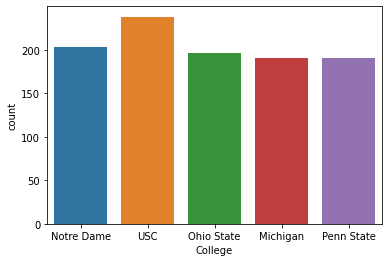

In [ ]:
sns.countplot(x='College', data=df2,
    order = ['Notre Dame', 'USC', 'Ohio State', 'Michigan', 'Penn State'])

In [ ]:
#checking where Tom Brady came from; note from Michigan, a top 5 NFL producing college
df2[df2.index == 'Brady, Tom']

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,
"Brady, Tom",39.00,1977-08-03,Michigan,Active,New England Patriots,76.00,Serra HS,"San Mateo, CA",12.00,tombrady/2504211,QB,225.00,NaN,1999,2017,18,San Mateo,CA,1977,40


In [ ]:
#this represents the active seasons played; retired players do not have a position value
df2.groupby('Position').mean().sort_values(by='Seasons', ascending = False)

,Age,Height (inches),Number,Weight (lbs),Year Start,Year End,Seasons,Birth Year,Season Age
Position,,,,,,,,,
T,28.09,78.01,72.90,317.41,2010.54,2017.00,6.46,1988.29,28.71
K,28.11,71.93,5.44,199.00,2010.87,2017.00,6.13,1988.33,28.67
LS,28.39,74.64,52.53,243.86,2011.23,2017.00,5.77,1988.02,28.98
FS,26.78,71.78,30.33,204.75,2011.47,2017.00,5.53,1989.68,27.32
MLB,26.48,73.43,56.00,239.90,2011.48,2017.00,5.52,1990.05,26.95
G,27.42,75.84,70.48,315.29,2011.49,2017.00,5.51,1989.02,27.98
SS,26.61,72.03,31.13,207.82,2011.52,2017.00,5.48,1989.84,27.16
QB,27.17,75.19,9.31,223.25,2011.67,2017.00,5.33,1989.26,27.74
OLB,26.69,74.41,59.00,246.70,2011.69,2017.00,5.31,1989.77,27.23


In [ ]:
#checking the unique values in the ['Current Status'] column
df2['Current Status'].unique()

array(['Retired', 'Active', 'Unsigned free agent', 'Suspended',
       'Injured reserve', 'Physically unable to perform'], dtype=object)

In [ ]:
#average length of tenure in the NFL for all non-active players
df2[(df2['Current Status'] != 'Active')].Seasons.mean()

4.203142432130904

In [ ]:
#checking the number of 0 values in the ['Seasons'] column
count = (df2['Seasons'] == 0).sum()
print(count)

287


In [ ]:
#Droping Seasons below 1
dfSeasons= df2.copy()
dfSeasons['Season1+']=(dfSeasons['Seasons']>=1)
dfSeasons.drop(dfSeasons[dfSeasons['Season1+'] == False].index, inplace=True)

In [ ]:
count = (dfSeasons['Seasons'] == 0).sum()
print(count)

0


In [ ]:
#this is the average for all retired players (Ignoring all zero seasons)
dfSeasons[(dfSeasons['Current Status'] != 'Active')].Seasons.mean()

4.314922944385948

In [ ]:
#checking to see if there are any additional values that are missing
df2[(df2['Current Status'] != 'Active') & (df2['Current Status'] != 'Unsigned free agent') & (df2['Current Status'] != 'Suspended') \
    & (df2['Current Status'] != 'Injured reserve') & (df2['Current Status'] != 'Physically unable to perform')\
    ].groupby('Position').sum().sum()

Age               0.00
Height (inches)   0.00
Number            0.00
Weight (lbs)      0.00
Year Start        0.00
Year End          0.00
Seasons           0.00
Birth Year        0.00
Season Age        0.00
dtype: float64

In [ ]:
#exploring the df; note that retired players do not have their position listed so will be unable to do statistics of retired players by position
df2[(df2['Current Status'] == 'Retired') & (df2['Position'].isnull()==False)]

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,


In [ ]:
#convert all NaN values for Year End to 2017
#exploring all non-active values
df2[(df2['Year End'].isnull()) & (df2['Current Status'] != 'Active')]['Current Status'].unique()

array([], dtype=object)

In [ ]:
#checking to see if there are any null values for non-active players
len(df2[(df2['Year End'].isnull()) & (df2['Current Status'] != 'Active')])

0

Heat Map of Where NFL Players were born in the US

This is further data visualization of where NFL players come from. Two maps are presented:


1.   Heat Map of where NFL players are born by state
2.   Google Map of where NFL players are born worldwide (https://www.google.com/maps/d/u/0/edit?mid=1IebNQGupVEQeqElWEzSKwapdaA2u2QY&ll=29.70822772970678%2C-97.21200287708658&z=4)



In [ ]:
#created a list of number of players by birth state; excluded Unknown birth state players
df_birth_state.loc[df_birth_state.index != 'Unknown'].sort_values(by='Number of Players', ascending=False)

,Number of Players
Birth State,
CA,1595
TX,1441
FL,922
PA,847
OH,830
IL,646
GA,554
LA,549
NY,493


In [ ]:
#chloropleth map of NFL player birth states
fig = go.Figure(data=go.Choropleth(
    locations=df_birth_state.index, # Spatial coordinates
    z = df_birth_state['Number of Players'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of Players",
))

fig.update_layout(
    title_text = 'NFL Football Player Birth States',
    geo_scope='usa', # limit map scope to USA
)

Map of where all NFL Players were born:
https://www.google.com/maps/d/u/0/edit?mid=1IebNQGupVEQeqElWEzSKwapdaA2u2QY&ll=29.70822772970678%2C-97.21200287708658&z=4

#Finding 2: Data Visualization from different parameters


*   Weight vs Position. Wide Receiver, Defensive Back and Corner Back players are much lighter than the rest of the team (under 200lbs on average), meanwhile lineman are over 300lbs on average.

*   Passer rating more predictable as players age. Mid 30's Average passer rating higher and more consistent than early 20's.

*   Passer ratings could vary much wider if minimum and maximums were not set. Around 25% of the data is either capped low or high.


#  Managerial Insights:
* To hire a quarterback, instead of looking at Passer rating, look at raw data for (a, b, c, d) Completion performance, Yards performance, Touch Down performance, Interception performance. Passer rating formula tends to skew players true performance positively or negatively by having top and bottom limits.

*   Expect higher Passer rating for quarterbacks over 30 years old. If possible, hire an older quarterback with more experience for less risk.

*   Ensure lineman are fit but also over 300lbs (a hard combination to achieve). Having lineman under 300lbs could be severely disadvantageous for defense or offence.






In [ ]:
#checking to confirm that ['Season Age'] seems right
df_pass3['Season Age'].describe()

count   2029.00
mean      28.16
std        4.23
min       21.00
25%       25.00
50%       27.00
75%       31.00
max       44.00
Name: Season Age, dtype: float64

In [ ]:
df_pass3.head()

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years
1,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,1974,23,0,1
2,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,2017,26,0,1
3,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,2017,24,0,0
4,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,1956,26,1,1
5,109,44,40.40,10.90,798.00,7.30,79.80,7,6.40,13,11.90,0,0,0,214,48.10,1956,24,0,1


In [ ]:
df2.head()

,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Player Id,Position,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age
Name,,,,,,,,,,,,,,,,,,,,
"Fowler, Bobby",56.00,1960-09-11,Louisiana Tech,Retired,NaN,74.00,NaN,NaN,NaN,bobbyfowler/2514295,NaN,230.00,1985 - 1985,1985,1985,1,Temple,TX,1960,25
"Johnson, Quinn",30.00,1986-09-30,LSU,Retired,NaN,73.00,NaN,NaN,NaN,quinnjohnson/79593,NaN,255.00,2009 - 2013,2009,2013,5,New Orleans,LA,1986,27
"Walton, L.T.",25.00,1992-03-31,Central Michigan,Active,Pittsburgh Steelers,77.00,Clintondale HS,"Clinton Twp.,Macomb Co., MI",96.00,l.t.walton/2552444,DE,305.00,NaN,2014,2017,3,Detroit,MI,1992,25
"Leggett, Jordan",22.00,1995-01-31,Clemson,Active,New York Jets,77.00,Navarre HS,FL,NaN,jordanleggett/2557885,TE,250.00,NaN,2016,2017,1,Navarre,FL,1995,22
"Gonda, George",98.00,1919-02-23,Duquesne,Retired,NaN,70.00,NaN,NaN,NaN,georgegonda/2515030,NaN,175.00,1942 - 1942,1942,1942,1,Alverton,PA,1919,23


In [ ]:
#Copy df2 for analytics on body measurments
dfbody=df2.copy()

In [ ]:
#Calculate different BMI's for each position
dfbody['BMI']=(703*dfbody['Weight (lbs)']/dfbody['Height (inches)']/dfbody['Height (inches)'])
dfbody.groupby('Position')['BMI'].mean()

Position
C     37.25
CB    26.52
DB    26.94
DE    34.04
DL    33.33
DT    38.35
FB    32.64
FS    27.94
G     38.55
ILB   31.19
K     27.04
LB    30.67
LS    30.82
MLB   31.28
NT    40.21
OG    37.78
OL    36.05
OLB   31.32
OT    36.06
P     27.10
QB    27.76
RB    30.10
SAF   27.40
SS    28.18
T     36.69
TE    30.23
WR    26.58
Name: BMI, dtype: float64

In [ ]:
#Average weight for each position
dfbody.groupby('Position')['Weight (lbs)'].mean()

Position
C     303.14
CB    193.40
DB    197.96
DE    278.32
DL    266.67
DT    306.50
FB    244.04
FS    204.75
G     315.29
ILB   237.85
K     199.00
LB    238.48
LS    243.86
MLB   239.90
NT    317.97
OG    313.02
OL    312.00
OLB   246.70
OT    312.12
P     210.32
QB    223.25
RB    215.07
SAF   206.39
SS    207.82
T     317.41
TE    252.23
WR    199.73
Name: Weight (lbs), dtype: float64

In [ ]:
#Average Height for each position
dfbody.groupby('Position')['Height (inches)'].mean()

Position
C     75.65
CB    71.63
DB    71.87
DE    75.86
DL    75.00
DT    74.98
FB    72.54
FS    71.78
G     75.84
ILB   73.22
K     71.93
LB    73.93
LS    74.64
MLB   73.43
NT    74.59
OG    76.34
OL    78.00
OLB   74.41
OT    78.02
P     73.89
QB    75.19
RB    70.88
SAF   72.78
SS    72.03
T     78.01
TE    76.61
WR    72.67
Name: Height (inches), dtype: float64

In [ ]:
from pandas.core.dtypes.dtypes import Ordered

#Analyze BMI, Weight, height. Sanity check to ensure data is sanitized correctly. Monitor for any findings.
BmiVsPos = px.box(dfbody, y="BMI", x='Position',
  category_orders={'Position':['CB','WR', 'DB', 'K', 'P', 'SAF', 'QB', 'FS', 'SS', 'RB', 'TE', 'LB', 'LS', 'ILB',
          'MLB', 'OLB', 'FB', 'DL','DE', 'OL', 'OT', 'T','C', 'OG', 'DT', 'G','NT']})

HeightVsPos = px.box(dfbody, y="Height (inches)", range_y= [65,85],x='Position',
  category_orders={'Position':['CB','WR', 'DB', 'K', 'P', 'SAF', 'QB', 'FS', 'SS', 'RB', 'TE', 'LB', 'LS', 'ILB',
          'MLB', 'OLB', 'FB', 'DL','DE', 'OL', 'OT', 'T','C', 'OG', 'DT', 'G','NT']})

WeightVsPos = px.box(dfbody, y="Weight (lbs)", range_y= [150,400], x='Position',
  category_orders={'Position':['CB','WR', 'DB', 'K', 'P', 'SAF', 'QB', 'FS', 'SS', 'RB', 'TE', 'LB', 'LS', 'ILB',
          'MLB', 'OLB', 'FB', 'DL','DE', 'OL', 'OT', 'T','C', 'OG', 'DT', 'G','NT']})

BmiVsPos.show()
WeightVsPos.show()
HeightVsPos.show()

In [ ]:
#looking at the players who have played the longest in the NFL
df2.Seasons.nlargest(10)

Name
Andersen, Morten     25
Carney, John         23
Anderson, Gary       23
Vinatieri, Adam      22
Feagles, Jeff        22
Landeta, Sean        22
Kasay, John          22
Hanson, Jason        21
Testaverde, Vinny    21
Marshall, Jim        20
Name: Seasons, dtype: int64

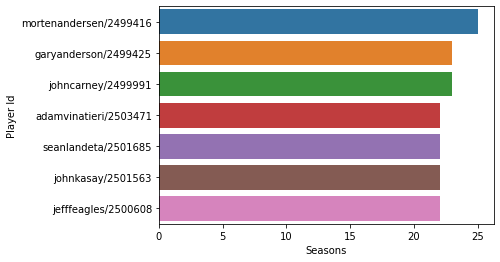

In [ ]:
#visualizing the above, Players over 21 seasons. NOTE, One player from results is still active. Will updtage based on current data.
dftopplayers = df2[df2['Seasons'] >21]
sns.barplot(data=dftopplayers,
            x='Seasons',
            y='Player Id',
order=['mortenandersen/2499416', 'garyanderson/2499425', 'johncarney/2499991', 'adamvinatieri/2503471', 'seanlandeta/2501685', 'johnkasay/2501563','jefffeagles/2500608'])

In [ ]:
#Box Plot on Passes attempted for statistical analysis and sanity check.
PassAtt = px.box(df_pass3, y="Passes Attempted",points='all')
PassAtt.show()

In [ ]:
#Box Plot on Completion percentage for statistical analysis and sanity check.
CompPer = px.box(df_pass3, y="Completion Percentage",points='all')
CompPer.show()

In [ ]:
#Box Plot on Pass Attempts per game for statistical analysis and sanity check.
AttPerGame = px.box(df_pass3, y="Pass Attempts Per Game",points='all')
AttPerGame.show()

In [ ]:
#this shows how long each current 'Active' player has played so far
SeasonsVsPos = px.box(df2, y="Seasons", x='Position', points='all',range_y = [0,25],)
SeasonsVsPos.show()

In [ ]:
#Determinng which position can retire at an older age
AgeVsPosbox = px.box(df2, y="Season Age", x='Position', range_y= [15,50],title="Age during retire vs Position",)
AgeVsPosbox.show()

In [ ]:
#Box Plot on Passing yards for statistical analysis and sanity check.
PassYard = px.box(df_pass3, y="Passing Yards",points='all')
PassYard.show()

In [ ]:
#Box Plot on TD Passes for statistical analysis and sanity check.
TDPass = px.box(df_pass3, y="TD Passes",points='all')
TDPass.show()

In [ ]:
#Box Plot on Interceptions for statistical analysis and sanity check.
Ints = px.box(df_pass3, y="Ints",points='all')
Ints.show()

In [ ]:
#Box Plot on Interception rate for statistical analysis and sanity check.
IntsRate = px.box(df_pass3, y="Int Rate",points='all')
IntsRate.show()

In [ ]:
#Box Plot on Sacks for statistical analysis and sanity check.
Sacks = px.box(df_pass3, y="Sacks",points='all')
Sacks.show()

In [ ]:
#Box Plot on Lost yards for statistical analysis and sanity check.
SackYdLost = px.box(df_pass3, y="Sacked Yards Lost",points='all')
SackYdLost.show()

In [ ]:
#Box Plot on Passer Rating for statistical analysis and sanity check.
PassRat = px.box(df_pass3, y="Passer Rating",points='all')
PassRat.show()

In [ ]:
#Passer rating vs Season Age. How does passer rating change vs age?
PassRat = px.box(df_pass3, y="Passer Rating",x='Season Age',points='all',title='Passer Rating vs Age')
PassRat.show()

In [ ]:
df_PassLast= df_pass3.copy()
df_PassLast.drop(df_PassLast[df_PassLast['Last Year'] == False].index, inplace=True)

#Retirement age overall distribution. Sanity check.
RetireAge = px.box(df_PassLast, y="Season Age",points='all')
RetireAge.show()

In [ ]:
#Are players retiring older or younger now than previous? Are there any trends in retireing age?
YearEndVsAge = px.box(df_pass3, y='Season Age',x="Year End",points='all')
YearEndVsAge.show()

In [ ]:
#Has Passer rating improved overtime?
PassRateVsYear= df_pass3.copy()
PassRateVsYear = px.box(df_pass3, y='Passer Rating',x="Year End",points='all')
PassRateVsYear.show()

In [ ]:
#Quaterback age, sanity check.
df_pass2['Age']  = df_pass2['Year'] - df_pass2['Birth Year']
fig = px.violin(df_pass2, y="Age", points='all')
fig.show()

In [ ]:
#Pass attempts per game, Sanity check.
PassAttPerGame = px.box(df_pass2, y='Pass Attempts Per Game',points='all')
PassAttPerGame.show()

In [ ]:
#calculating passer rating. No max/min limits set at this time. Vefired Passer ratings are correct from given excel numbers.
df_pass['a(CompletionPerformance)']=(df_pass['Passes Completed']/df_pass['Passes Attempted']-.3)*5
df_pass.head()

df_pass['b(YardsPerformance)']=(df_pass['Passing Yards']/df_pass['Passes Attempted']-3)*.25
df_pass.head()

df_pass['c(TDPerformance)']= (df_pass['TD Passes']/df_pass['Passes Attempted'])*20
df_pass.head()

df_pass['d(IntPerformance']= 2.375 - (df_pass['Ints']/df_pass['Passes Attempted'])*25
df_pass.head()

PasserRatingStats = px.box(df_pass, x=['d(IntPerformance','c(TDPerformance)','b(YardsPerformance)','a(CompletionPerformance)'])
PasserRatingStats.show()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,a(CompletionPerformance)
Name,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.00,0.20,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,39.60,-1.50
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.10,1.90,108.00,5.10,9.80,1,4.80,2,9.50,0,0,0,0,31.50,0.40
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,0.04


,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,a(CompletionPerformance),b(YardsPerformance)
Name,,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN,NaN
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.00,0.20,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,39.60,-1.50,-0.75
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.10,1.90,108.00,5.10,9.80,1,4.80,2,9.50,0,0,0,0,31.50,0.40,0.54
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN,NaN
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,0.04,0.27


,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,a(CompletionPerformance),b(YardsPerformance),c(TDPerformance)
Name,,,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN,NaN,NaN
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.00,0.20,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,39.60,-1.50,-0.75,0.00
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.10,1.90,108.00,5.10,9.80,1,4.80,2,9.50,0,0,0,0,31.50,0.40,0.54,0.95
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN,NaN,NaN
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,0.04,0.27,1.03


,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,a(CompletionPerformance),b(YardsPerformance),c(TDPerformance),d(IntPerformance
Name,,,,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN,NaN,NaN,NaN
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.00,0.20,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,39.60,-1.50,-0.75,0.00,2.38
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.10,1.90,108.00,5.10,9.80,1,4.80,2,9.50,0,0,0,0,31.50,0.40,0.54,0.95,-0.01
"Demory, Bill",billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,NaN,NaN,NaN,NaN
"Demory, Bill",billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,0.04,0.27,1.03,-2.75


# Finding 3:Classification Tree to Predict if a Quarterback will continue playing or not


*   A Combination of Passer rating and Passing Yards per attempt seem to be one of the biggest contributors to determine if a quarterback will continue to play next season. Passer rating below 4.4 will typically end quarterbacks’ career, unless they have at least 10.6 passing yards per attempt. For those with passer rating above 4.4, they must have interception rate less than 1 in 5 to continue into next season.

*   For Quarterbacks 37 years old or younger, having a passing yards per attempt of 5 or lower will likely terminate their season. Meaning,

*   For Quarterbacks 38 years or older, having an interception rate higher than 4.4 will likely end their career.

#  Managerial Insights:
*   Look for new talent once a quarterback is reaching 38 years or older.

*   As a quarterback with a passer rating below 4.4, start saving money more aggressively. Perhaps start looking into a different career for next season.

*   Look for hidden talent past the passer rating. Touchdown performance is a significant factor "Calculation for C" but bottlenecked by a maximum 2.375. Around 25% of the quarterbacks achieved higher than a 2.375 calculation for "C" but scores rounded down to 2.375. Max value for this data would have been 20.


Setting the variables for the decision tree

In [ ]:
X = df_pass3.drop(columns=['Last Year','Last 3 Years'])

In [ ]:
X

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age
1,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,1974,23
2,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,2017,26
3,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,2017,24
4,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,1956,26
5,109,44,40.40,10.90,798.00,7.30,79.80,7,6.40,13,11.90,0,0,0,214,48.10,1956,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,233,128,54.90,21.20,1562.00,6.70,142.00,9,3.90,14,6.00,0,0,23,187,63.60,1976,28
6455,74,41,55.40,10.60,580.00,7.80,82.90,5,6.80,7,9.50,0,0,9,55,64.00,1976,27
6456,27,10,37.00,5.40,194.00,7.20,38.80,2,7.40,2,7.40,0,0,0,0,56.70,1976,26
6457,137,65,47.40,15.20,1050.00,7.70,116.70,3,2.20,9,6.60,0,0,26,184,53.50,1976,25


In [ ]:
Y = df_pass3['Last Year']

In [ ]:
Y

1       0
2       0
3       0
4       1
5       0
       ..
6454    0
6455    0
6456    0
6457    0
6458    0
Name: Last Year, Length: 2029, dtype: int64

This code will generate and fit a decision tree dt

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y

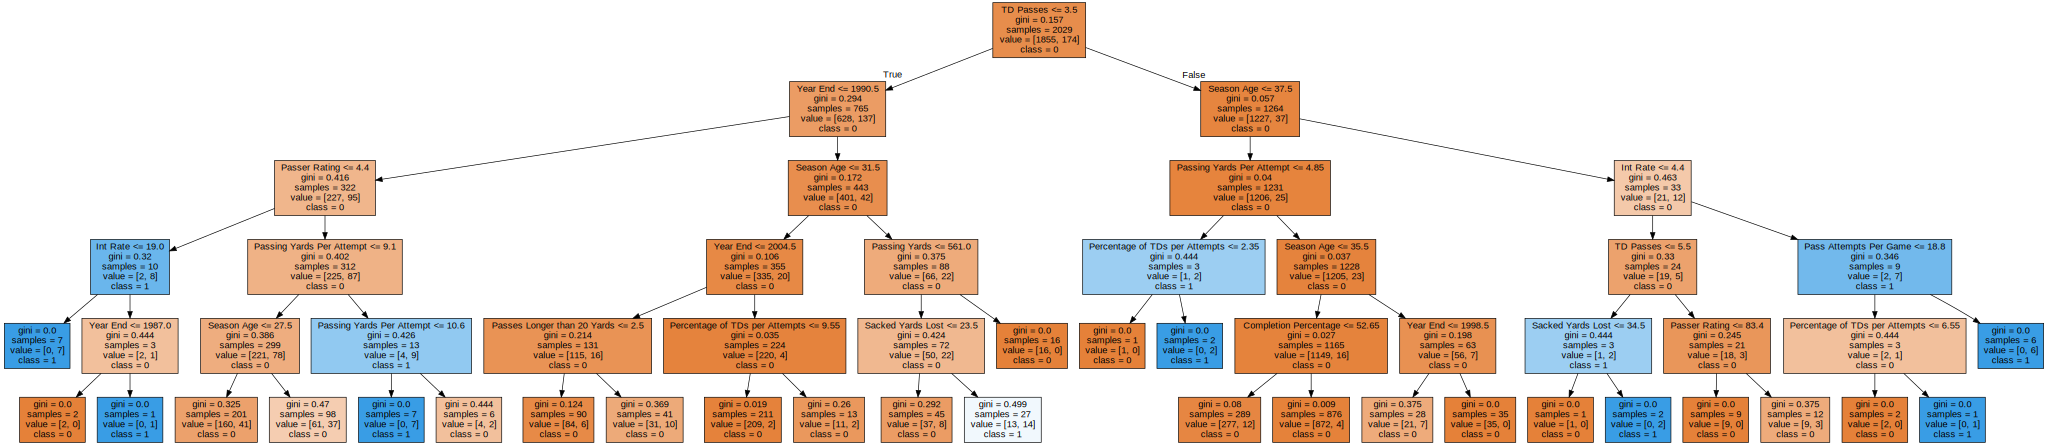

In [ ]:
import graphviz
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
df_pass3.dtypes

Passes Attempted                    int64
Passes Completed                    int64
Completion Percentage             float64
Pass Attempts Per Game            float64
Passing Yards                     float64
Passing Yards Per Attempt         float64
Passing Yards Per Game            float64
TD Passes                           int64
Percentage of TDs per Attempts    float64
Ints                                int64
Int Rate                          float64
Passes Longer than 20 Yards         int64
Passes Longer than 40 Yards         int64
Sacks                               int64
Sacked Yards Lost                   int64
Passer Rating                     float64
Year End                            int64
Season Age                          int64
Last Year                           int64
Last 3 Years                        int64
dtype: object

In [ ]:
df_pass2.head()

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age,Last Year,Last 3 Years
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,24,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,1,1
1,billdemory/2512778,NaN,1973,New York Jets,6,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,23,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,23,0,1
2,tomsavage/2543640,QB,2016,Houston Texans,3,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,26,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,26,0,1
3,tomsavage/2543640,QB,2014,Houston Texans,2,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,24,1990-04-26,Pittsburgh,Active,Houston Texans,76.00,Cardinal O'Hara HS,"Springfield, PA",3.00,QB,230.00,NaN,2013,2017,4,Clifton Heights,PA,1990,24,0,0
4,jackscarbath/2524989,NaN,1956,Pittsburgh Steelers,7,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,26,1930-08-12,Maryland,Retired,NaN,74.00,NaN,NaN,NaN,NaN,206.00,1953 - 1956,1953,1956,3,Baltimore,MD,1930,26,1,1


In [ ]:
df_pass2.describe()

,Year,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Height (inches),Number,Weight (lbs),Year Start,Year End,Seasons,Birth Year,Season Age,Last Year,Last 3 Years
count,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,880.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00,6460.00
mean,1992.06,10.61,73.14,42.10,24.27,6.74,508.26,3.38,45.54,3.13,3.00,2.67,2.81,3.93,0.71,5.08,36.81,33.88,27.55,73.33,19.81,209.69,1987.35,1996.88,10.08,1964.51,27.55,0.11,0.34
std,16.51,5.61,149.70,89.45,31.34,11.45,1070.91,6.12,79.99,7.09,12.13,5.35,10.63,11.73,2.25,10.68,76.58,41.50,4.00,2.27,23.89,17.58,16.19,16.63,4.39,16.33,4.00,0.31,0.47
min,1932.00,0.00,0.00,0.00,0.00,0.00,-11.00,-11.00,-4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.00,66.00,1.00,153.00,1932.00,1935.00,1.00,1906.00,21.00,0.00,0.00
25%,1979.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,72.00,7.00,198.00,1975.00,1984.00,7.00,1952.00,24.00,0.00,0.00
50%,1994.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.00,73.00,11.00,210.00,1988.00,2000.00,10.00,1965.00,27.00,0.00,0.00
75%,2006.00,16.00,42.25,22.00,53.60,9.50,265.50,6.40,57.52,1.00,2.80,2.00,2.70,0.00,0.00,3.00,22.00,69.83,30.00,75.00,19.00,220.00,2002.00,2012.00,13.00,1979.00,30.00,0.00,1.00
max,2016.00,16.00,727.00,471.00,100.00,51.00,5477.00,81.00,342.30,55.00,100.00,35.00,100.00,81.00,18.00,76.00,481.00,158.30,44.00,80.00,89.00,346.00,2015.00,2017.00,22.00,1995.00,44.00,1.00,1.00


In [ ]:
df_pass2[df_pass2['Pass Attempts Per Game'] == 0]

,Player Id,Position_x,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Age,Birthday,College,Current Status,Current Team,Height (inches),High School,High School Location,Number,Position_y,Weight (lbs),Years Played,Year Start,Year End,Seasons,Birth City,Birth State,Birth Year,Season Age,Last Year,Last 3 Years
0,billdemory/2512778,NaN,1974,New York Jets,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,24,1950-12-01,Arizona,Retired,NaN,74.00,NaN,NaN,NaN,NaN,195.00,1973 - 1974,1973,1974,2,Indianola,IA,1950,24,1,1
17,kennyharrison/2516009,NaN,1980,Washington Redskins,9,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,27,1953-12-12,Southern Methodist,Retired,NaN,72.00,NaN,NaN,NaN,NaN,176.00,1976 - 1980,1976,1980,4,Beaumont,TX,1953,27,1,1
18,kennyharrison/2516009,NaN,1978,San Francisco 49ers,8,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,25,1953-12-12,Southern Methodist,Retired,NaN,72.00,NaN,NaN,NaN,NaN,176.00,1976 - 1980,1976,1980,4,Beaumont,TX,1953,25,0,1
20,kennyharrison/2516009,NaN,1976,San Francisco 49ers,11,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,23,1953-12-12,Southern Methodist,Retired,NaN,72.00,NaN,NaN,NaN,NaN,176.00,1976 - 1980,1976,1980,4,Beaumont,TX,1953,23,0,0
21,paulmaguire/2519977,NaN,1970,Buffalo Bills,14,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,32,1938-08-22,The Citadel,Retired,NaN,72.00,NaN,NaN,NaN,NaN,228.00,1960 - 1970,1960,1970,11,Youngstown,OH,1938,32,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441,jimlash/2519115,NaN,1973,Minnesota Vikings,9,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,22,1951-11-12,Northwestern,Retired,NaN,73.00,NaN,NaN,NaN,NaN,200.00,1973 - 1977,1973,1977,5,Akron,OH,1951,22,0,0
6442,legedunaanee/2495689,NaN,2012,Miami Dolphins,4,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,29,1983-09-16,Boise State,Retired,NaN,74.00,NaN,NaN,NaN,NaN,215.00,2007 - 2012,2007,2012,6,Portland,OR,1983,29,1,1
6444,legedunaanee/2495689,NaN,2010,San Diego Chargers,10,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,27,1983-09-16,Boise State,Retired,NaN,74.00,NaN,NaN,NaN,NaN,215.00,2007 - 2012,2007,2012,6,Portland,OR,1983,27,0,1
6446,legedunaanee/2495689,NaN,2008,San Diego Chargers,16,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0.00,25,1983-09-16,Boise State,Retired,NaN,74.00,NaN,NaN,NaN,NaN,215.00,2007 - 2012,2007,2012,6,Portland,OR,1983,25,0,0


In [ ]:
#need to filter out pass attempts per game == 0 as it likely skews the decision
[df_pass3['Pass Attempts Per Game'] != 0]

[1       True
 2       True
 3       True
 4       True
 5       True
         ... 
 6454    True
 6455    True
 6456    True
 6457    True
 6458    True
 Name: Pass Attempts Per Game, Length: 2029, dtype: bool]

In [ ]:
df_pass3.describe()

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years
count,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00
mean,231.34,133.33,54.82,21.23,1607.55,6.60,143.73,9.84,3.82,8.40,4.46,12.43,2.24,16.03,116.11,70.61,1997.39,28.16,0.09,0.29
std,186.69,115.48,9.50,10.52,1374.47,1.50,79.37,9.70,2.63,6.58,3.62,18.24,3.57,13.72,97.39,22.79,16.74,4.23,0.28,0.46
min,3.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1939.00,21.00,0.00,0.00
25%,56.00,29.00,50.00,11.50,352.00,5.80,71.50,2.00,2.40,2.00,2.40,0.00,0.00,3.00,29.00,58.20,1984.00,25.00,0.00,0.00
50%,194.00,103.00,55.80,23.10,1259.00,6.70,151.90,7.00,3.70,7.00,3.70,1.00,0.00,13.00,98.00,72.90,1999.00,27.00,0.00,0.00
75%,380.00,219.00,60.60,29.80,2699.00,7.40,206.50,16.00,5.10,13.00,5.60,22.00,4.00,26.00,185.00,85.20,2013.00,31.00,0.00,1.00
max,727.00,471.00,100.00,51.00,5477.00,17.70,342.30,55.00,33.30,35.00,40.00,81.00,18.00,76.00,481.00,158.30,2017.00,44.00,1.00,1.00


In [ ]:
#Last year
df_pass3['Last Year'].sum()

174

In [ ]:
#this drops any row that has 0 in the df_pass3['Pass Attempts Per Game'] column
df_pass3.loc[(df_pass3[['Pass Attempts Per Game']].lt(1).any(1))]

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years


In [ ]:
df_pass3['Last Year'].sum()

174

In [ ]:
df_pass3

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years
1,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,1974,23,0,1
2,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,2017,26,0,1
3,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,2017,24,0,0
4,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,1956,26,1,1
5,109,44,40.40,10.90,798.00,7.30,79.80,7,6.40,13,11.90,0,0,0,214,48.10,1956,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,233,128,54.90,21.20,1562.00,6.70,142.00,9,3.90,14,6.00,0,0,23,187,63.60,1976,28,0,1
6455,74,41,55.40,10.60,580.00,7.80,82.90,5,6.80,7,9.50,0,0,9,55,64.00,1976,27,0,1
6456,27,10,37.00,5.40,194.00,7.20,38.80,2,7.40,2,7.40,0,0,0,0,56.70,1976,26,0,0
6457,137,65,47.40,15.20,1050.00,7.70,116.70,3,2.20,9,6.60,0,0,26,184,53.50,1976,25,0,0


In [ ]:
df_pass3.describe()

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years
count,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00,2029.00
mean,231.34,133.33,54.82,21.23,1607.55,6.60,143.73,9.84,3.82,8.40,4.46,12.43,2.24,16.03,116.11,70.61,1997.39,28.16,0.09,0.29
std,186.69,115.48,9.50,10.52,1374.47,1.50,79.37,9.70,2.63,6.58,3.62,18.24,3.57,13.72,97.39,22.79,16.74,4.23,0.28,0.46
min,3.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1939.00,21.00,0.00,0.00
25%,56.00,29.00,50.00,11.50,352.00,5.80,71.50,2.00,2.40,2.00,2.40,0.00,0.00,3.00,29.00,58.20,1984.00,25.00,0.00,0.00
50%,194.00,103.00,55.80,23.10,1259.00,6.70,151.90,7.00,3.70,7.00,3.70,1.00,0.00,13.00,98.00,72.90,1999.00,27.00,0.00,0.00
75%,380.00,219.00,60.60,29.80,2699.00,7.40,206.50,16.00,5.10,13.00,5.60,22.00,4.00,26.00,185.00,85.20,2013.00,31.00,0.00,1.00
max,727.00,471.00,100.00,51.00,5477.00,17.70,342.30,55.00,33.30,35.00,40.00,81.00,18.00,76.00,481.00,158.30,2017.00,44.00,1.00,1.00


In [ ]:
len(df_pass3)

2029

In [ ]:
#Pass attempts per game. Sanity check.
df_pass2['Last Year'].sum()
PassAttPerGamePre = px.box(df_pass3, y="Pass Attempts Per Game",points='all')
PassAttPerGamePre.show()

682

In [ ]:
df_pass3['Last Year'].sum()

174

In [ ]:
df_pass3
df_pass3['Passes Completed'].describe()

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last Year,Last 3 Years
1,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,1974,23,0,1
2,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,2017,26,0,1
3,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,2017,24,0,0
4,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,1956,26,1,1
5,109,44,40.40,10.90,798.00,7.30,79.80,7,6.40,13,11.90,0,0,0,214,48.10,1956,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,233,128,54.90,21.20,1562.00,6.70,142.00,9,3.90,14,6.00,0,0,23,187,63.60,1976,28,0,1
6455,74,41,55.40,10.60,580.00,7.80,82.90,5,6.80,7,9.50,0,0,9,55,64.00,1976,27,0,1
6456,27,10,37.00,5.40,194.00,7.20,38.80,2,7.40,2,7.40,0,0,0,0,56.70,1976,26,0,0
6457,137,65,47.40,15.20,1050.00,7.70,116.70,3,2.20,9,6.60,0,0,26,184,53.50,1976,25,0,0


count   2029.00
mean     133.33
std      115.48
min        0.00
25%       29.00
50%      103.00
75%      219.00
max      471.00
Name: Passes Completed, dtype: float64

In [ ]:
X = df_pass3.drop(columns='Last Year',)
X

,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating,Year End,Season Age,Last 3 Years
1,39,12,30.80,6.50,159.00,4.10,26.50,2,5.10,8,20.50,0,0,8,73,22.20,1974,23,1
2,73,46,63.00,24.30,461.00,6.30,153.70,0,0.00,0,0.00,5,0,5,36,80.90,2017,26,1
3,19,10,52.60,9.50,127.00,6.70,63.50,0,0.00,1,5.30,2,0,1,5,51.90,2017,24,0
4,41,12,29.30,5.90,208.00,5.10,29.70,2,4.90,5,12.20,0,0,0,36,24.90,1956,26,1
5,109,44,40.40,10.90,798.00,7.30,79.80,7,6.40,13,11.90,0,0,0,214,48.10,1956,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,233,128,54.90,21.20,1562.00,6.70,142.00,9,3.90,14,6.00,0,0,23,187,63.60,1976,28,1
6455,74,41,55.40,10.60,580.00,7.80,82.90,5,6.80,7,9.50,0,0,9,55,64.00,1976,27,1
6456,27,10,37.00,5.40,194.00,7.20,38.80,2,7.40,2,7.40,0,0,0,0,56.70,1976,26,0
6457,137,65,47.40,15.20,1050.00,7.70,116.70,3,2.20,9,6.60,0,0,26,184,53.50,1976,25,0


In [ ]:
Y = df_pass3['Last Year']
Y

1       0
2       0
3       0
4       1
5       0
       ..
6454    0
6455    0
6456    0
6457    0
6458    0
Name: Last Year, Length: 2029, dtype: int64

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

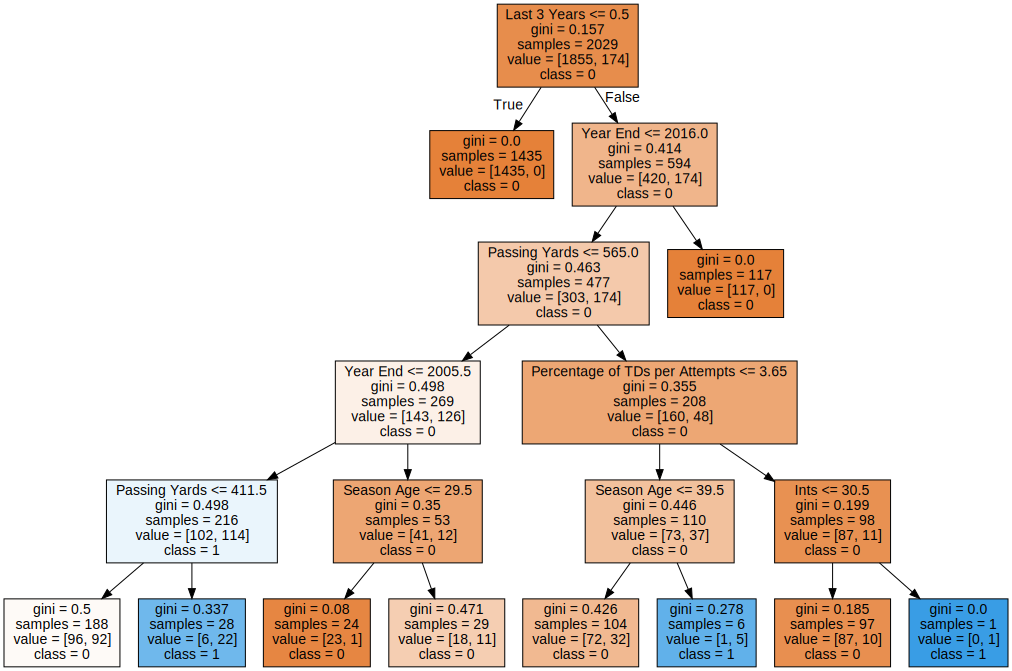

In [ ]:
import graphviz
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)
graph = graphviz.Source(dot_data)
graph